Dataset investigation to determine Word2Vec hyperparameters.

In [1]:
from recipe_rec.data import load_dataset
import itertools
import pickle
from recipe_rec.recipe2vec import Recipe2Vec

In [2]:
load_dataset("./data/recipes.csv")

# Effect of Alpha and Num. Epochs on Loss Stabilisation

In [3]:
import tqdm

Train models with varying alpha and a large number of epochs:

In [7]:
alphas = [0.025, 0.01, 0.04]

losses = {}
models = []
for alpha in tqdm.tqdm(alphas):
    model = Recipe2Vec(
        alpha=alpha,
        num_epochs=300,
        verbose=False,
    )

    training_losses = model.training_losses

    losses[alpha] = training_losses

    print(training_losses)

    models.append(model)

  0%|          | 0/1 [00:00<?, ?it/s]12:49:50.word2vec: collecting all words and their counts
12:49:50.word2vec: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
12:49:50.word2vec: PROGRESS: at sentence #10000, processed 78783 words, keeping 3498 word types
12:49:50.word2vec: PROGRESS: at sentence #20000, processed 156666 words, keeping 4106 word types
12:49:50.word2vec: PROGRESS: at sentence #30000, processed 234118 words, keeping 4459 word types
12:49:50.word2vec: PROGRESS: at sentence #40000, processed 312517 words, keeping 4694 word types
12:49:50.word2vec: PROGRESS: at sentence #50000, processed 392108 words, keeping 4858 word types
12:49:50.word2vec: PROGRESS: at sentence #60000, processed 471699 words, keeping 5007 word types
12:49:50.word2vec: PROGRESS: at sentence #70000, processed 550299 words, keeping 5126 word types
12:49:50.word2vec: PROGRESS: at sentence #80000, processed 631287 words, keeping 5227 word types
12:49:50.word2vec: PROGRESS: at sentence #9000

[11754243.0, 11547181.0, 11744893.0, 11526799.0, 11442978.0, 11451053.0, 11585983.0, 11587392.0, 11717736.0, 11583649.0, 11580013.0, 11484902.0, 11543023.0, 11548035.0, 11534323.0, 11439837.0, 11219943.0, 11519033.0, 11356777.0, 11444678.0, 11366667.0, 11434578.0, 11493002.0, 11431334.0, 11485799.0, 11547463.0, 11400436.0, 11833598.0, 11493946.0, 11575042.0]


Configure into a DataFrame and plot:

In [4]:
import pandas as pd

losses_df = pd.DataFrame(losses)

In [ ]:
import re
from matplotlib.pyplot import Figure
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["figure.dpi"] = 300
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.serif"] = ["Computer Modern"]

cols_ordered = [0.01, 0.025, 0.04]
for col in cols_ordered:

    ax = sns.lineplot(
        x=[i for i in range(1, 31)],
        y=[(loss) for loss in losses_df[col]][:30],
        label=f"alpha={col}",
    )

ax.set(xlabel="Epoch Number", ylabel="Training Loss")
plt.show()

# Number of Ingredients Per Recipe

Explore recipe ingredient distribution:

In [10]:
from recipe_rec.data import load_dataset

load_dataset("./data/recipes.csv")

from recipe_rec.data import store

recipes = store["recipes"]

In [11]:
recipes["IngredientLen"] = recipes["RecipeIngredientParts"].str.len()

In [12]:
len(recipes[recipes["IngredientLen"] > 19])

4721

15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
15:41:46 texmanager  No LaTeX-compatible font found for

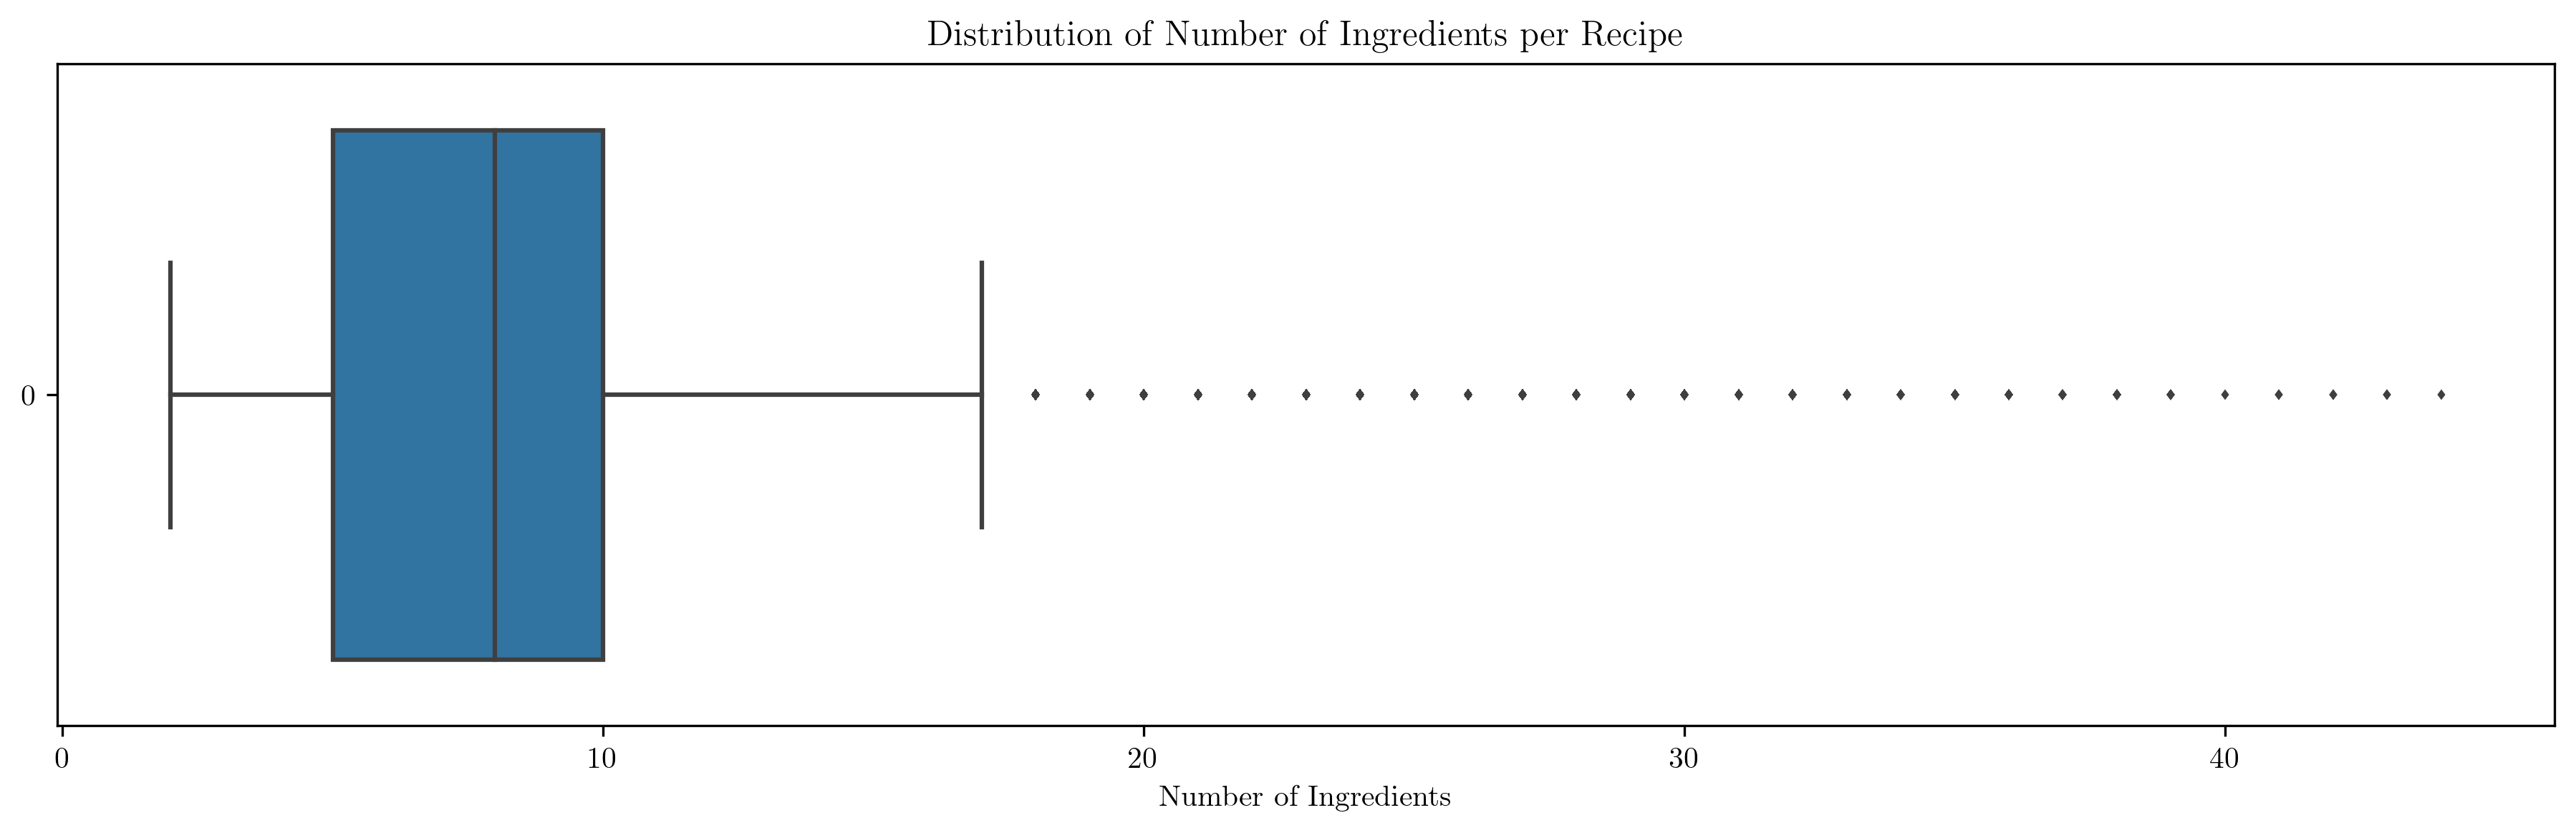

In [13]:
plt.figure(figsize=(15, 4))
ax = sns.boxplot(recipes["IngredientLen"], fliersize=1.5, orient="h")

ax.set(
    xlabel="Number of Ingredients",
    title="Distribution of Number of Ingredients per Recipe",
)

plt.show()

Statistics:

In [14]:
recipes["IngredientLen"].describe()

count    511626.000000
mean          8.054245
std           3.847504
min           2.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          44.000000
Name: IngredientLen, dtype: float64

In [15]:
recipes["IngredientLen"].median()

8.0

Number of training words:

In [16]:
recipes["IngredientLen"].sum()

4120761